In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [4]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

# Explanatory data analysis

Text(0.5, 1.0, ' Types of customers ')

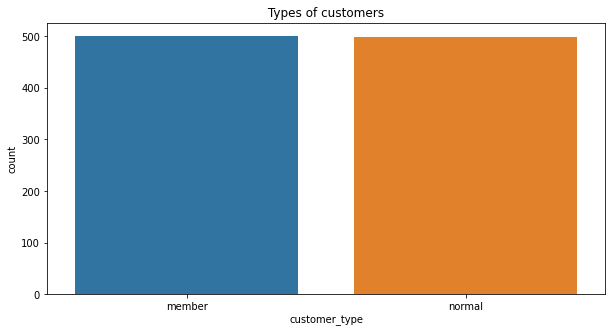

In [11]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'customer_type', data = df)
plt.title(" Types of customers ")

Text(0.5, 1.0, ' Number of transactions per gender')

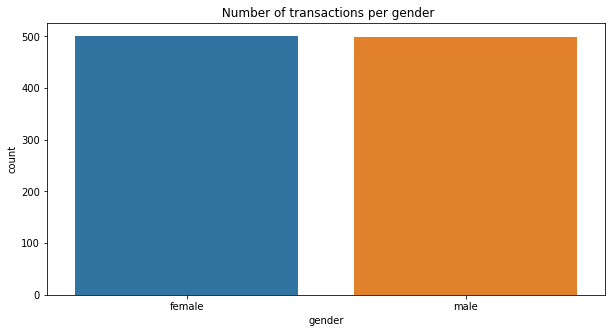

In [12]:
plt.figure(figsize= (10, 5))
sns.countplot(x= 'gender', data = df)
plt.title(" Number of transactions per gender")

Text(0.5, 1.0, ' gross income in m by city')

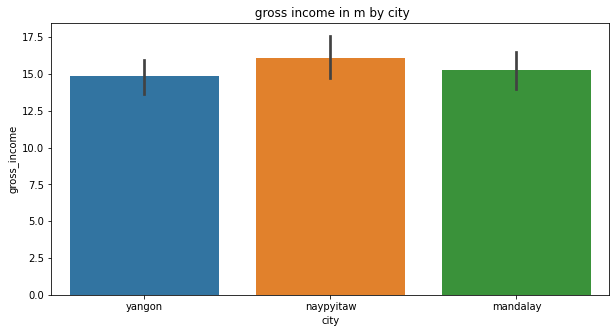

In [13]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'city', y= 'gross_income',data = df)
plt.title(" gross income in m by city")

Text(0.5, 1.0, 'Tax payed per city')

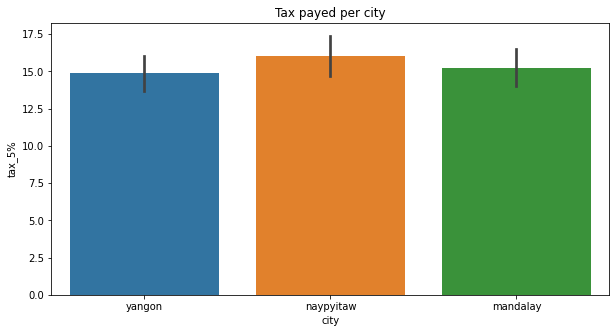

In [14]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'city',y= 'tax_5%', data = df)
plt.title("Tax payed per city")

Text(0.5, 1.0, 'Gross income  per product line')

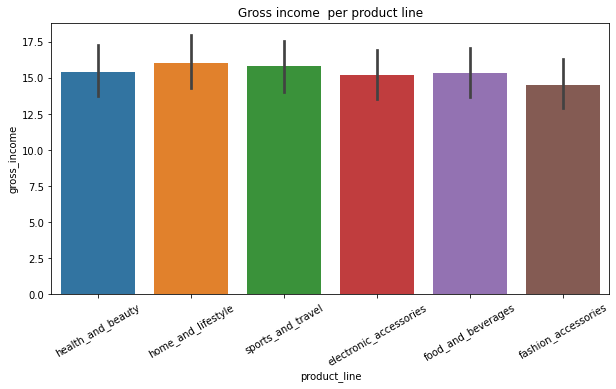

In [15]:
plt.figure(figsize= (10, 5))
plt.xticks(rotation = 30)
sns.barplot(x= 'product_line', y='gross_income', data = df, order = df.product_line.value_counts().sort_values(ascending = True).index)
plt.title("Gross income  per product line")

In [16]:
# df.iloc[df['gross_income'].sum()].sort_values(ascending = False).head()

Best_branch = df.groupby("branch")['gross_income'].sum().sort_values(ascending = False).head()
Best_city =  df.groupby("city")['gross_income'].sum().sort_values(ascending = False).head()

print(Best_branch)
print(Best_city)

branch
c    5265.1765
a    5057.1605
b    5057.0320
Name: gross_income, dtype: float64
city
naypyitaw    5265.1765
yangon       5057.1605
mandalay     5057.0320
Name: gross_income, dtype: float64


Text(0.5, 1.0, 'Grows income distribution')

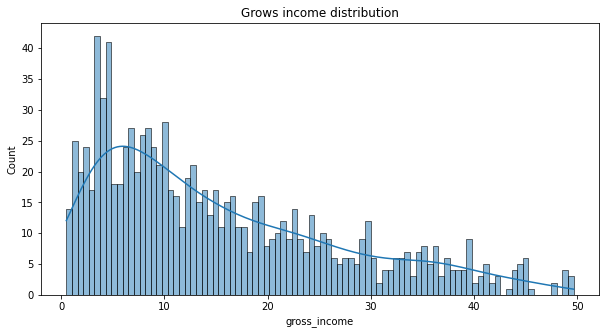

In [17]:
plt.figure(figsize = (10, 5))
sns.histplot(x=df.gross_income, kde= True, bins = 90)
plt.title("Grows income distribution")

<AxesSubplot:xlabel='tax_5%', ylabel='Count'>

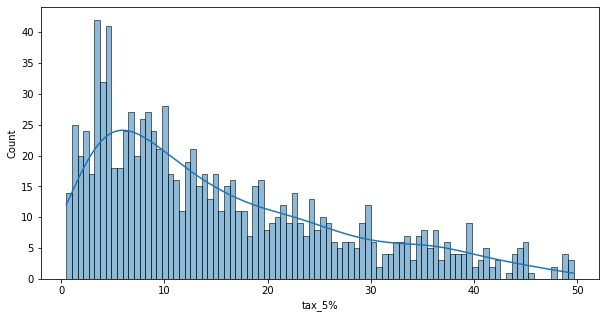

In [18]:
plt.figure(figsize = (10, 5))
sns.histplot(x=df['tax_5%'], kde= True, bins = 90)

Text(0.5, 1.0, 'Unit price distribution ')

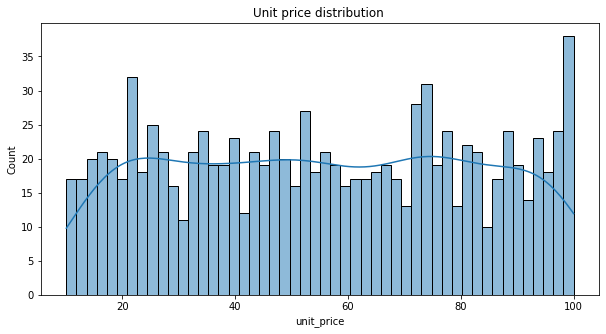

In [19]:
plt.figure(figsize = (10, 5))
sns.histplot(x=df['unit_price'], kde= True, bins = 50)
plt.title("Unit price distribution ")

Text(0.5, 1.0, ' Product quantity distribution ')

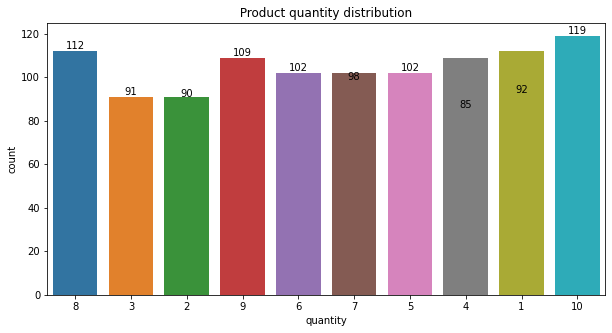

In [20]:
plt.figure(figsize = (10, 5))
ax =sns.countplot(x= "quantity", data =df)
for container in ax.containers:
    ax.bar_label(container)
sns.countplot(x = df.quantity, order = df.quantity.value_counts().sort_values(ascending=True).index)    
plt.title(" Product quantity distribution ")

<AxesSubplot:xlabel='gross_income', ylabel='product_line'>

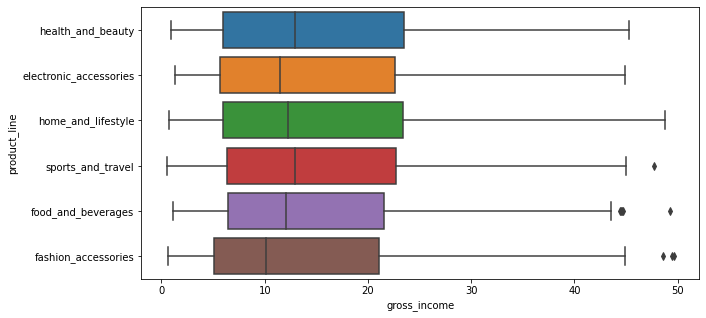

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot( y = df.product_line, x= df.gross_income)

Text(0.5, 1.0, 'Payment methods used ')

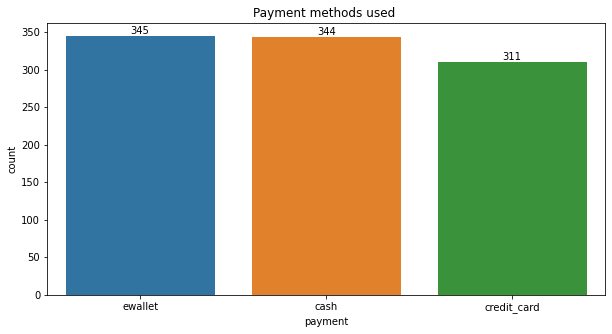

In [22]:
plt.figure(figsize= (10, 5))
ax = sns.countplot(x="payment", data = df)
for container in ax.containers:
    ax.bar_label(container)
sns.countplot( x = df.payment, data = df)
plt.title('Payment methods used ')

Text(0.5, 1.0, 'Quantity of items boughr per day')

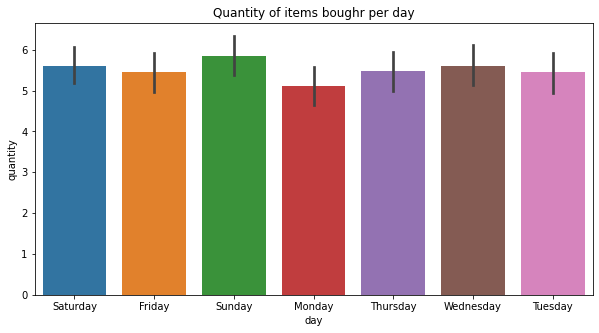

In [23]:
plt.figure(figsize = (10, 5))
sns.barplot(y='quantity', x ='day', data =df)
plt.title("Quantity of items boughr per day")

## Preparing Data for prediction

##### Working on categorical variables

In [24]:
df['gender']=0
df.loc[df['gender']=="female",'gender']=1
df.loc[(df['gender']=="male"),'gender']=2

In [25]:
df['product_line']=0
df.loc[df['product_line'] == 'health_and_beauty', 'product_line']=1
df.loc[df['product_line'] == 'electronic_accessories', 'product_line'] = 2
df.loc[df['product_line']==  'home_and_lifestyle', 'product_line'] = 3
df.loc[df['product_line'] == 'sports_and_travel', 'product_line'] = 4
df.loc[df['product_line'] == 'food_and_beverages','product_line'] = 5
df.loc[df['product_line'] == 'fashion_accessories', 'product_line'] = 6

In [26]:
df.loc[df['customer_type'] =='member', 'customer_type']= 1
df.loc[df['customer_type'] == 'normal', 'customer_type'] = 2

In [27]:
df.loc[df['city']== 'yangon', 'city'] = 1
df.loc[df['city']== 'naypyitaw', 'city'] =2
df.loc[df['city']== 'mandalay', 'city'] =3

In [28]:
df.loc[df['branch'] == 'a', 'branch'] = 1
df.loc[df['branch'] == 'b', 'branch'] = 2
df.loc[df['branch'] == 'c', 'branch'] = 3
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,year,month,day
0,750-67-8428,1,1,1,0,0,74.69,7,26.1415,548.9715,2019-01-05,13:08,ewallet,522.83,4.761905,26.1415,9.1,2019,1,Saturday
1,226-31-3081,3,2,2,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29,cash,76.40,4.761905,3.8200,9.6,2019,3,Friday
2,631-41-3108,1,1,2,0,0,46.33,7,16.2155,340.5255,2019-03-03,13:23,credit_card,324.31,4.761905,16.2155,7.4,2019,3,Sunday
3,123-19-1176,1,1,1,0,0,58.22,8,23.2880,489.0480,2019-01-27,20:33,ewallet,465.76,4.761905,23.2880,8.4,2019,1,Sunday
4,373-73-7910,1,1,2,0,0,86.31,7,30.2085,634.3785,2019-02-08,10:37,ewallet,604.17,4.761905,30.2085,5.3,2019,2,Friday


In [29]:
df.loc[df['day'] == 'Sunday', 'day'] = 1
df.loc[df['day'] == 'Monday', 'day'] = 2
df.loc[df['day'] == 'Tuesday', 'day'] = 3
df.loc[df['day'] == 'Wednesday', 'day'] = 4
df.loc[df['day'] == 'Thursday', 'day'] = 5
df.loc[df['day'] == 'Friday', 'day'] = 6
df.loc[df['day'] == 'Saturday', 'day'] = 7


In [30]:
others = df[["product_line", "quantity", "customer_type", "branch", "gross_income", "day"]]
# sns.pairplot(others)

## We will predict the Gross Income of the company, individually and in a period

In [31]:
df.drop(['invoice_id', 'tax_5%', 'time', 'payment', 'date'], axis = 1, inplace=True)

In [32]:
df

,branch,city,customer_type,gender,product_line,unit_price,quantity,total,cogs,gross_margin_percentage,gross_income,rating,year,month,day
0,1,1,1,0,0,74.69,7,548.9715,522.83,4.761905,26.1415,9.1,2019,1,7
1,3,2,2,0,0,15.28,5,80.2200,76.40,4.761905,3.8200,9.6,2019,3,6
2,1,1,2,0,0,46.33,7,340.5255,324.31,4.761905,16.2155,7.4,2019,3,1
3,1,1,1,0,0,58.22,8,489.0480,465.76,4.761905,23.2880,8.4,2019,1,1
4,1,1,2,0,0,86.31,7,634.3785,604.17,4.761905,30.2085,5.3,2019,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,0,0,40.35,1,42.3675,40.35,4.761905,2.0175,6.2,2019,1,3
996,2,3,2,0,0,97.38,10,1022.4900,973.80,4.761905,48.6900,4.4,2019,3,7
997,1,1,1,0,0,31.84,1,33.4320,31.84,4.761905,1.5920,7.7,2019,2,7
998,1,1,2,0,0,65.82,1,69.1110,65.82,4.761905,3.2910,4.1,2019,2,6


#### Selecting features and splitting data

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Defining features
X = df[['branch', 'city', 'customer_type', 'gender', 'product_line', 'quantity', 'cogs', 'gross_margin_percentage',
    'month']]
y = df['gross_income']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(f'Total number of feature dataset: {len(X)}')
print(f'Total number of training data: {len(X_train)}')
print(f'Shape of train data: {X_train.shape}')
print(f'Shape of test data: {X_test.shape}')

Total number of feature dataset: 1000
Total number of training data: 750
Shape of train data: (750, 9)
Shape of test data: (250, 9)


#### Selecting, Fitting,  Training Model

In [34]:
#Selecting Model
model = LinearRegression()

#Fitting Model
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions

In [35]:
predictions = model.predict(X_test)
predictions

array([25.215 , 19.232 , 15.9025,  7.18  ,  9.32  ,  2.531 ,  7.66  ,
        4.3   , 10.3845, 41.315 , 13.83  , 34.3   ,  2.37  , 35.0685,
       12.9185, 26.235 , 10.6225, 20.652 ,  4.154 ,  6.322 ,  9.885 ,
       21.565 ,  9.2125,  6.94  , 33.439 ,  5.344 , 15.291 ,  1.6815,
        3.655 , 16.7725,  4.3725,  6.807 , 12.668 ,  9.989 , 34.2265,
       29.913 , 39.155 , 40.7835,  3.0125, 33.725 , 10.715 , 19.264 ,
        9.476 , 35.3475,  4.4875,  6.354 ,  4.897 ,  5.611 ,  1.25  ,
        2.0175,  6.2325, 19.884 ,  7.863 ,  3.406 , 28.744 ,  7.39  ,
       15.953 , 14.694 , 20.545 ,  4.91  , 35.516 ,  3.305 , 19.375 ,
        2.686 ,  0.5085, 16.2425, 12.835 , 15.904 , 27.18  , 21.783 ,
        3.855 ,  9.191 ,  5.977 ,  3.333 , 39.695 ,  7.935 ,  7.352 ,
       27.935 ,  4.935 ,  4.4075,  6.524 ,  7.163 , 14.296 , 28.956 ,
        3.285 ,  5.803 ,  1.131 ,  1.487 ,  7.239 ,  5.986 , 12.036 ,
       13.962 ,  9.8475, 22.7205, 20.372 ,  9.34  , 10.863 , 11.28  ,
        6.45  , 32.3

## Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, predictions))

Mean Squared Error: 1.4582473472321041e-28


### Mean square error

In [37]:
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 1.2075791266960952e-14


Mean Absolute percentage Error

In [38]:
import sklearn.metrics as m
print("Mean Absolute Percentage Error:",np.mean(np.abs( (y_test-predictions) / y_test))*100)

Mean Absolute Percentage Error: 1.6959730789501848e-13
